# Hyperparameter Optimization


We used random search for doing the hyperparameter optimization

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
directory = '../results/hyperparameter/'

In [3]:
val_loss = []
filters = []
kernels = []
res = []
val_epoch = []
lr = []
l2 = []
for i in range(44):
    with open(directory + str(i+1)+'/model-history.pkl', 'rb') as f:
        data= pickle.load(f)
        val_loss.append(data['model']['val_loss'][-1])
        filters.append(str(data['parameters']['num_filters']))
        kernels.append(str(data['parameters']['kernel_size']))
        res.append(str(data['parameters']['res_blocks']))
        lr.append(str(data['model']['lr'][0]))
        l2.append(str(data['parameters']['l2']))
        val_epoch.append(data['model']['val_loss'])

Getting best models

In [4]:
best_models = np.argsort(val_loss)
best_models +1

array([28, 40, 27, 16, 15, 22, 38, 44, 17, 21, 36, 20, 18, 41,  9, 39, 11,
       25, 33, 12,  5, 29,  4, 14, 10,  8,  1, 13,  6,  7, 34,  3, 23,  2,
       32, 19, 26, 24, 37, 42, 35, 30, 31, 43])

In [5]:
len(best_models)

44

Two models were interrupted

In [6]:
np.sort(val_loss)

array([0.04368008, 0.04468215, 0.04657751, 0.04725984, 0.04822509,
       0.04848919, 0.04897143, 0.05016595, 0.05033535, 0.05104194,
       0.05144404, 0.05159494, 0.05187805, 0.05380616, 0.05598624,
       0.05811455, 0.06060733, 0.06258147, 0.06332156, 0.06468768,
       0.06747396, 0.06832984, 0.06920101, 0.07024735, 0.07219487,
       0.07389252, 0.07446109, 0.07494862, 0.07897267, 0.08666363,
       0.0981876 , 0.09845497, 0.13068397, 0.46515048, 1.02904642,
       1.39223504, 1.41514158, 6.98163414, 7.21572733, 7.23387623,
       7.25061703, 7.33144999,        nan,        nan])

Opening history file of the best models

In [7]:
with open(directory + '28/model-history.pkl', 'rb') as f:
    data= pickle.load(f)
data['parameters']

{'name': '/FINAL_2/28',
 'num_convs': 4,
 'num_filters': 23,
 'kernel_size': 4,
 'lr': 0.0009243681625712621,
 'res_blocks': 1,
 'l2': 0.0001,
 'extra': False,
 'gaussian': False}

In [8]:
with open(directory + '40/model-history.pkl', 'rb') as f:
    data= pickle.load(f)
data['parameters']

{'name': '/FINAL_2/40',
 'num_convs': 4,
 'num_filters': 20,
 'kernel_size': 5,
 'lr': 0.0005898859206688481,
 'res_blocks': 1,
 'l2': 5.898859206688481e-05,
 'extra': False,
 'gaussian': False}

In [9]:
with open(directory + '27/model-history.pkl', 'rb') as f:
    data= pickle.load(f)
data['parameters']

{'name': '/FINAL_2/27',
 'num_convs': 4,
 'num_filters': 23,
 'kernel_size': 4,
 'lr': 0.00012036046360303748,
 'res_blocks': 1,
 'l2': 1.3700601995153551e-05,
 'extra': False,
 'gaussian': False}

Model 40 and 27 have basically the same parameters...

## Visualizing the validation loss for each model depending on the number of filters

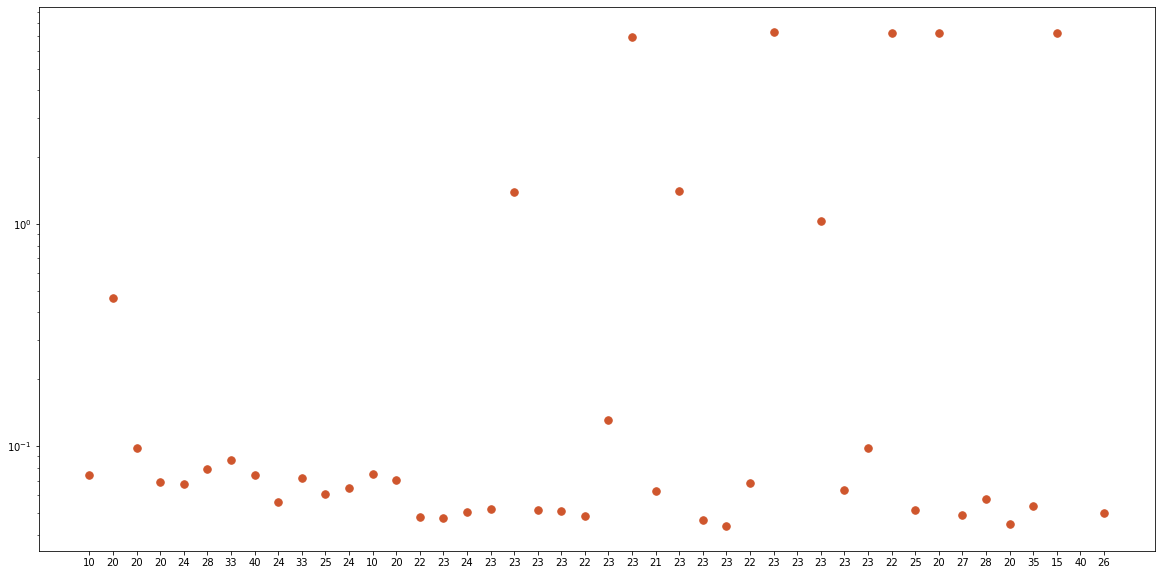

In [10]:
fig = plt.figure(figsize=(20,10))
filters_x = [i for i in range(len(filters))]
plt.plot(filters_x, val_loss, ".", markersize=15, color =  '#cf562d')
plt.xticks(filters_x, filters)
plt.yscale('log')

Since they are not in order its dificult to see the best model, so lets sort them

Text(0, 0.5, 'Validation Loss')

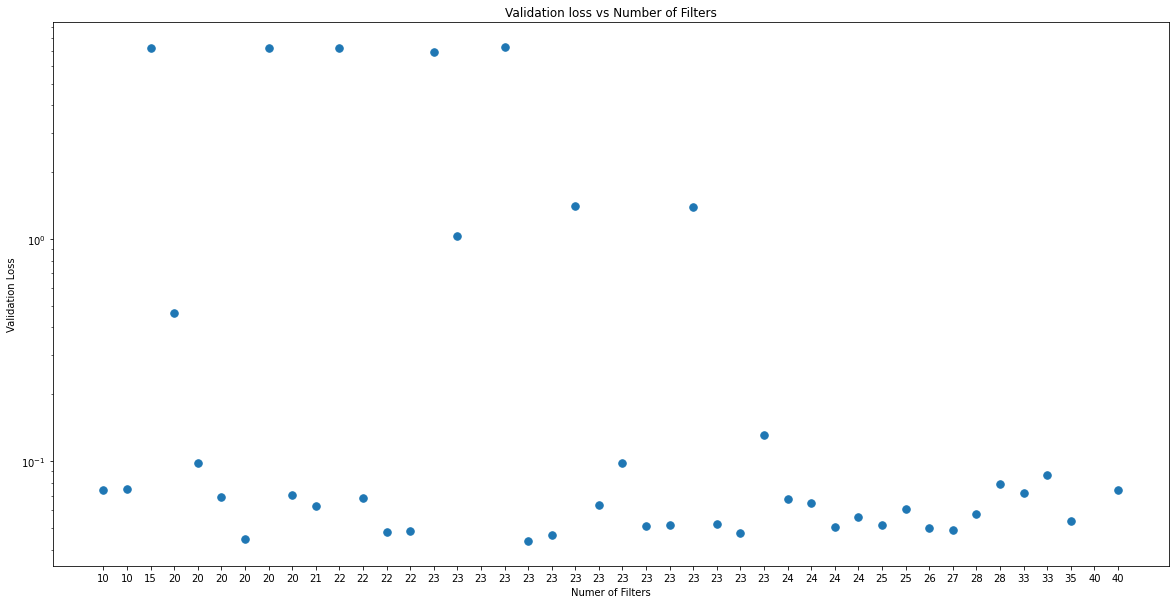

In [11]:
sort_loss = np.argsort(filters)

filter_vals = [val_loss[i] for i in sort_loss]
fil_sort = np.sort(filters)

fig = plt.figure(figsize=(20,10))
filters_x = [i for i in range(len(fil_sort))]
plt.plot(filters_x, filter_vals,".", markersize=15)
plt.xticks(filters_x, fil_sort)
plt.yscale('log')
plt.title('Validation loss vs Number of Filters')
plt.xlabel('Numer of Filters')
plt.ylabel('Validation Loss')


The minimum is reached by 20 and 23 filters, there is a tendency, some of the losses are very high since they didnt converge because of other set parameters.

Now we will sort by kernel size

[ 0 42 22 17  1 31 30 29 28 18 26 25 24 23 33 19 32 27 21 15  5  6  7  8
  9  4 11 12 13 14 40 39 37 43 20  2 10 36 34 35  3 38 16 41]


Text(0, 0.5, 'Validation loss')

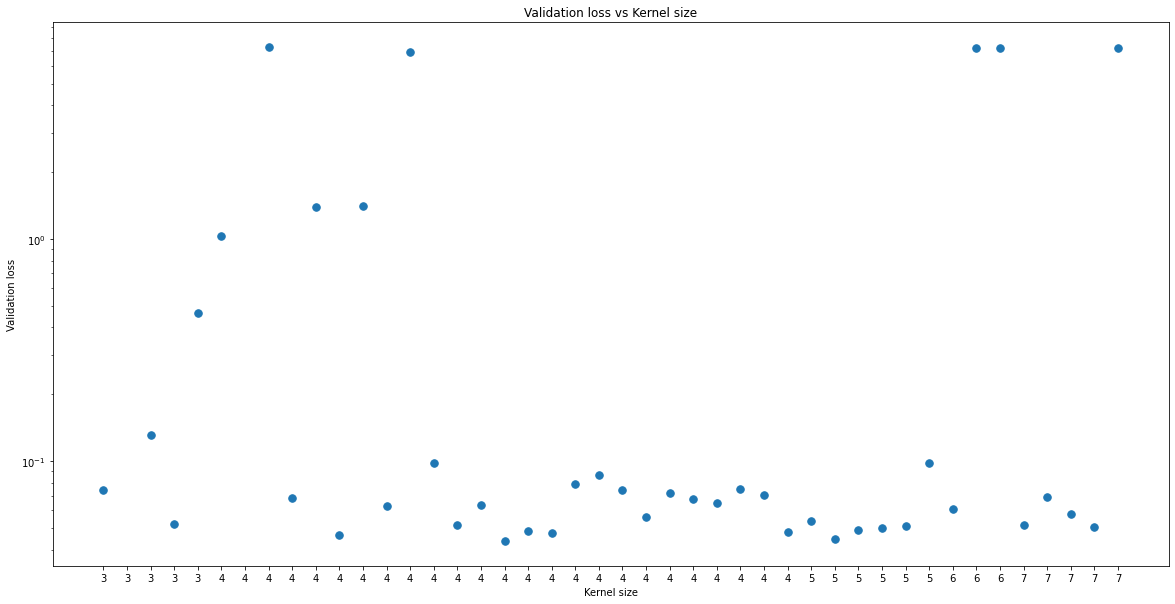

In [12]:
sort_loss = np.argsort(kernels)
print(sort_loss)

ker_vals = [val_loss[i] for i in sort_loss]
ker_sort = np.sort(kernels)

fig = plt.figure(figsize=(20,10))
kernels_x = [i for i in range(len(ker_sort))]
plt.plot(kernels_x, ker_vals,".", markersize=15)
plt.xticks(kernels_x, ker_sort)
plt.yscale('log')
plt.title('Validation loss vs Kernel size')
plt.xlabel('Kernel size')
plt.ylabel('Validation loss')

Seems that a kernel size between 4 and 5 lead to best results.

[ 0 18  7  6  5 25  3  2  1  4 27 28 29 30 31 32 34 35 36 26 38 39 40 41
 33 37 21 14  8  9 10 24 15 43 17 20 42 22 16 19 12 11 13 23]


Text(0, 0.5, 'Validation loss')

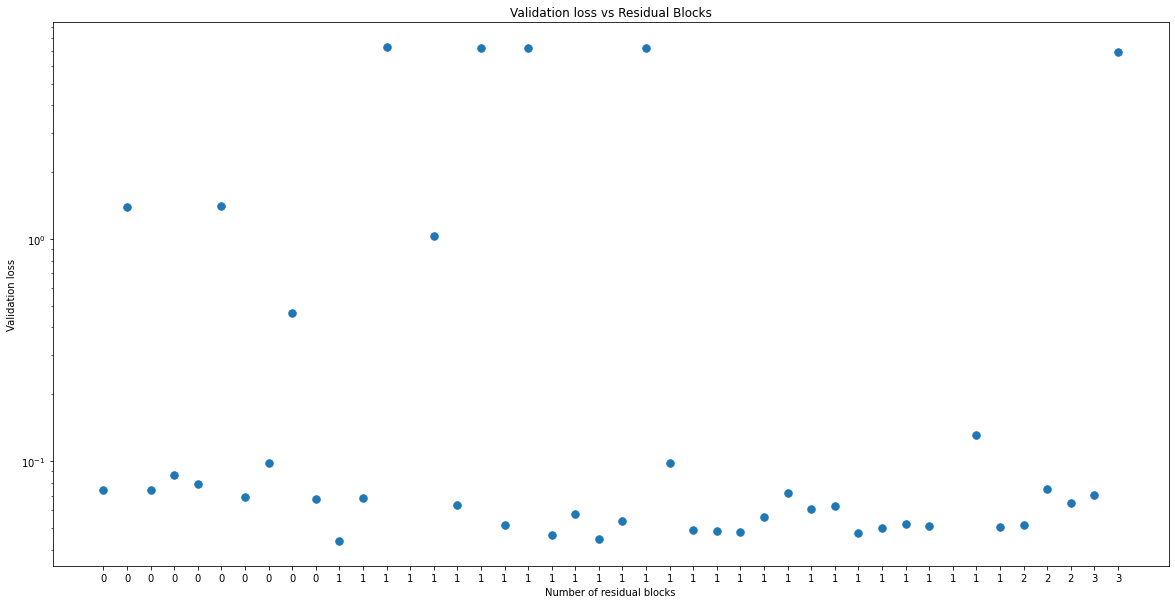

In [13]:
sort_loss = np.argsort(res)
print(sort_loss)

res_vals = [val_loss[i] for i in sort_loss]
res_sort = np.sort(res)

fig = plt.figure(figsize=(20,10))
res_x = [i for i in range(len(res_sort))]
plt.plot(res_x, res_vals, ".", markersize=15)
plt.xticks(res_x, res_sort)
plt.yscale('log')
plt.title('Validation loss vs Residual Blocks')
plt.xlabel('Number of residual blocks')
plt.ylabel('Validation loss')

One residual layer seems to lead better results.

[ 1  6  5  7  2  9 12 13  3  4  0 38 20 37 24 26 33 28 35 43 10 11 14 25
 18 16 31 15 19 42  8 17 22 40 39 23 36 34 32 21 27 41 29 30]


Text(0, 0.5, 'Validation loss')

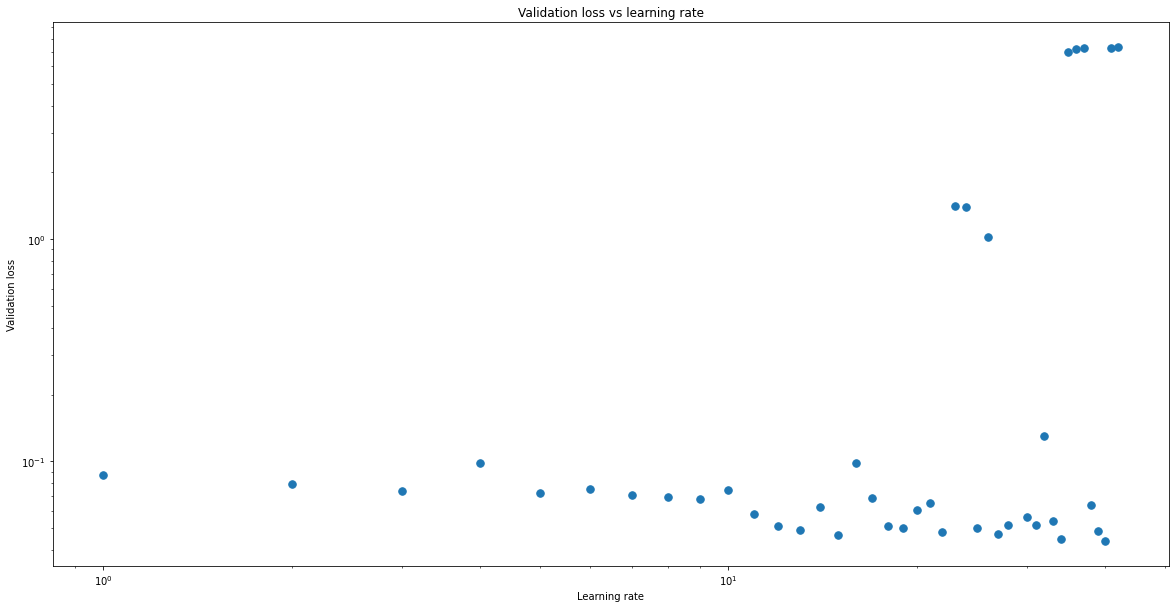

In [14]:
lr_f = [float(lr[i]) for i in range(len(lr))]
sort_loss = np.argsort(lr_f)
print(sort_loss)


lr_vals = [val_loss[i] for i in sort_loss]
lr_sort = np.sort(lr_f)

fig = plt.figure(figsize=(20,10))
lr_x = [i for i in range(len(lr_sort))]
plt.plot(lr_x, lr_vals,  ".", markersize=15)
#sorted_vals = [round(float(i),5) for i in lr_f]
plt.xticks(lr_x, lr_sort)
plt.xscale('log') # Set log scale on X-axis
plt.yscale('log')
plt.title('Validation loss vs learning rate')
plt.xlabel('Learning rate')
plt.ylabel('Validation loss')

[38 37 20  1  6 24 26  5  7 35 43  2  9 14 42 12 13 25 40  3 18 39  4  0
 36 34 16 41 15 19 27 28 29 10 17 11 22 23  8 30 21 31 32 33]


Text(0, 0.5, 'Validation loss')

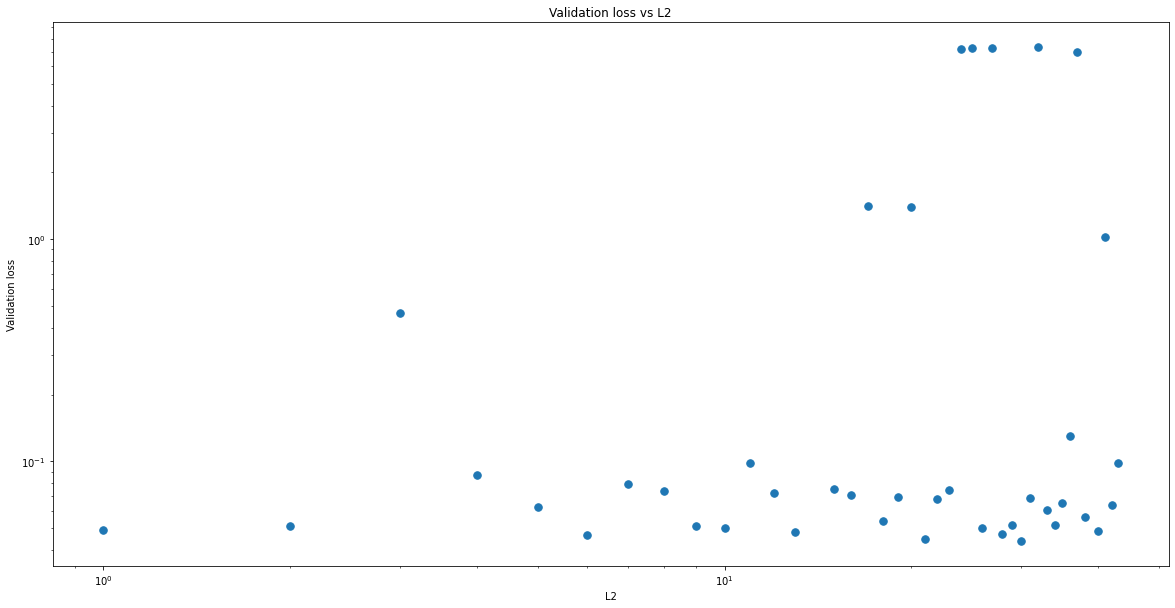

In [15]:
l2_f = [float(l2[i]) for i in range(len(l2))]
sort_loss = np.argsort(l2_f)
print(sort_loss)

l2_vals = [val_loss[i] for i in sort_loss]
l2_sort = np.sort(l2_f)

fig = plt.figure(figsize=(20,10))
l2_x = [i for i in range(len(l2))]
plt.plot(l2_x, l2_vals,  ".", markersize=15)
#sorted_vals = [round(float(i),5) for i in lr_f]
plt.xticks(l2_x, l2_sort)
plt.xscale('log') # Set log scale on X-axis
plt.yscale('log')
plt.title('Validation loss vs L2')
plt.xlabel('L2')
plt.ylabel('Validation loss')

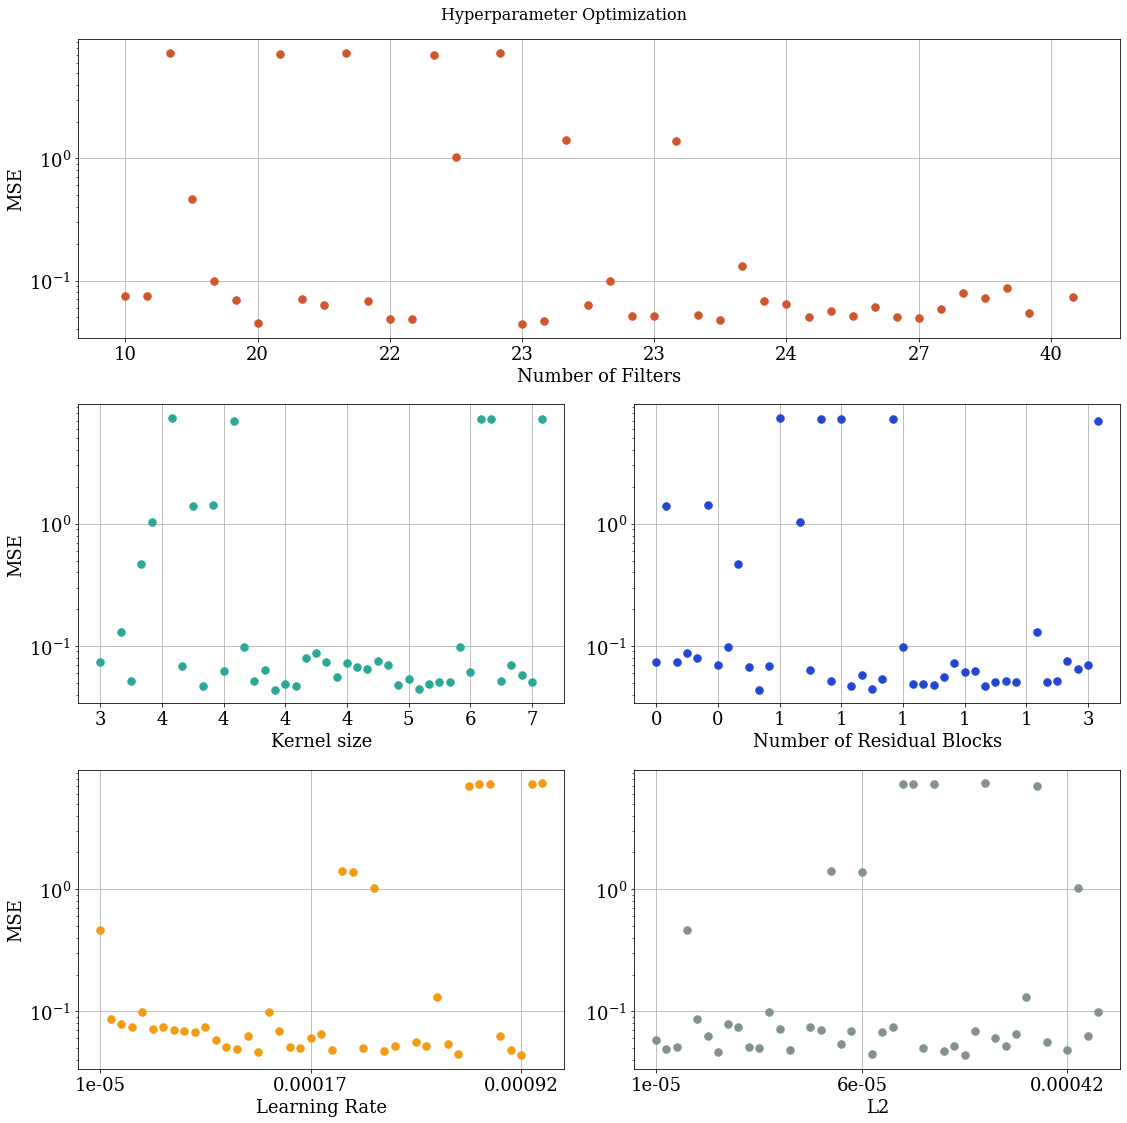

In [16]:
from matplotlib import gridspec
import matplotlib.ticker as mticker

np.random.seed(19680801)

x = np.random.rand(10)
y = np.random.rand(10)
z = np.sqrt(x**2 + y**2)

# plot it
plt.rcParams.update({'font.size': 18})
plt.rcParams["font.family"] = "serif"
fig = plt.figure(figsize=(16, 16))
fig.suptitle('Hyperparameter Optimization', fontsize=16)

gs = gridspec.GridSpec(6, 2)

ax0 = plt.subplot(gs[0:2,0:2])
ax0.plot(filters_x, filter_vals, ".", markersize=15, color =  '#cf562d')
ax0.set_xticks(np.arange(0,len(filters_x),6))
ticks_loc = ax0.get_xticks().tolist()
ax0.set_xticklabels([fil_sort[x] for x in ticks_loc])
ax0.set_yscale('log')
ax0.set_xlabel('Number of Filters')
ax0.set_ylabel('MSE')
ax0.grid()

ax1 = plt.subplot(gs[2:4,0])
ax1.plot(kernels_x, ker_vals, ".", markersize=15, color =  '#2ca89a')
ax1.set_xticks(np.arange(0,len(kernels_x),6))
ticks_loc = ax1.get_xticks().tolist()
ax1.set_xticklabels([ker_sort[x] for x in ticks_loc])
ax1.set_yscale('log')
ax1.set_xlabel('Kernel size')
ax1.set_ylabel('MSE')
ax1.grid()

ax2 = plt.subplot(gs[2:4,1])
ax2.plot(res_x, res_vals, ".", markersize=15, color =  '#2447D3')
ax2.set_xticks(np.arange(0,len(res_x),6))
ticks_loc = ax2.get_xticks().tolist()
ax2.set_xticklabels([res_sort[x] for x in ticks_loc])
ax2.set_yscale('log')
ax2.set_xlabel('Number of Residual Blocks')
ax2.grid()

ax3 = plt.subplot(gs[4:6,0])
ax3.plot(lr_x, lr_vals, ".", markersize=15, color =  '#F39C12')
ax3.set_xticks(np.arange(0,len(lr_x),20))
ticks_loc = ax3.get_xticks().tolist()
ax3.set_xticklabels([np.round(lr_sort[x],5) for x in ticks_loc])
ax3.set_yscale('log')
ax3.set_xlabel('Learning Rate')
ax3.set_ylabel('MSE')
ax3.grid()

ax4 = plt.subplot(gs[4:6,1])
ax4.plot(l2_x, l2_vals, ".", markersize=15, color =  '#839192')
ax4.set_xticks(np.arange(0,len(l2_x),20))
ticks_loc = ax4.get_xticks().tolist()
ax4.set_xticklabels([np.round(l2_sort[x],5) for x in ticks_loc])
ax4.set_yscale('log')
ax4.set_xlabel('L2')
ax4.grid()

plt.tight_layout()
#plt.show()
plt.savefig('hyp.png' ,dpi=300,bbox_inches='tight')

Text(0, 0.5, 'MSE')

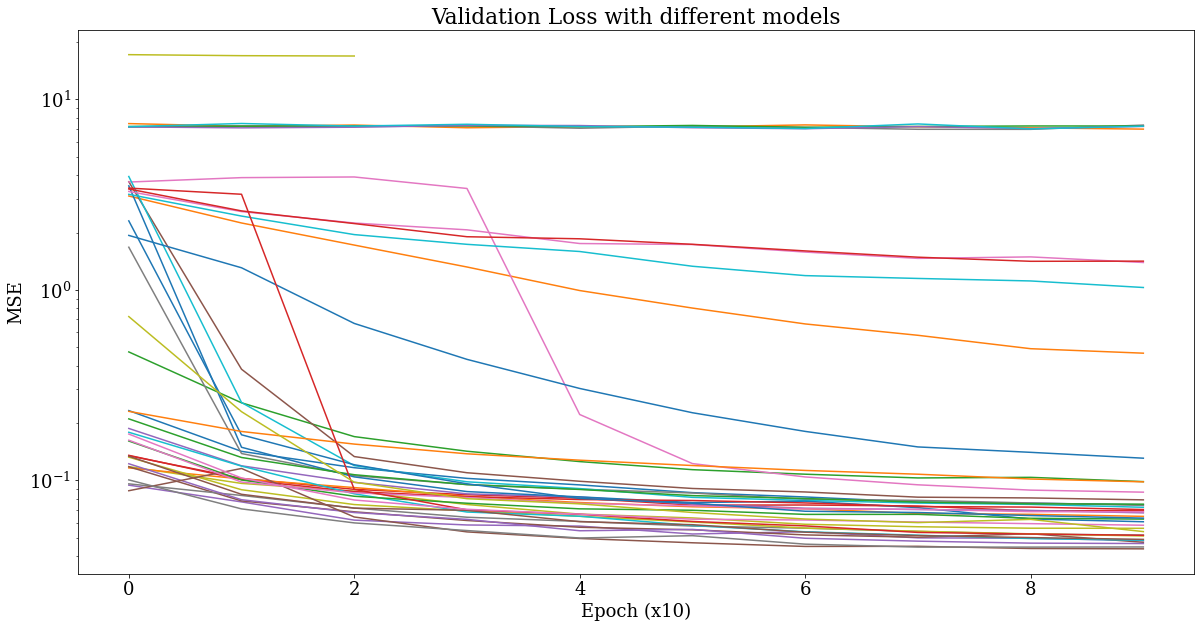

In [17]:
fig = plt.figure(figsize=(20,10))
x = range(10)
a = list(range(16))
b = list(range(18,43))
for i in a+b:
    
    plt.plot(x, val_epoch[i], label = 'Model' + str(i+1))
    
plt.yscale('log')
plt.title('Validation Loss with different models')
plt.xlabel('Epoch (x10)')
plt.ylabel('MSE')

# Training of the best two models

In [22]:
import pickle
import numpy as np
with open('../results/output/model_1_vs_2_final.pkl', 'rb') as f:
    data = pickle.load(f)

In [23]:
cf_1 = []
cf_2 = []

std_1 = []
std_2 = []

for i in ['0.0001', '0.001', '0.01', '0.1', '0.3', '0.5', '0.7', '1.0']:
    cf_1.append(np.mean(data['model_1']['cf_' + str(i)]))
    std_1.append(np.std(data['model_1']['cf_' + str(i)]))
    cf_2.append(np.mean(data['model_2']['cf_' + str(i)]))
    std_2.append(np.std(data['model_2']['cf_' + str(i)]))
    

<ipython-input-24-297cc8b32094>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


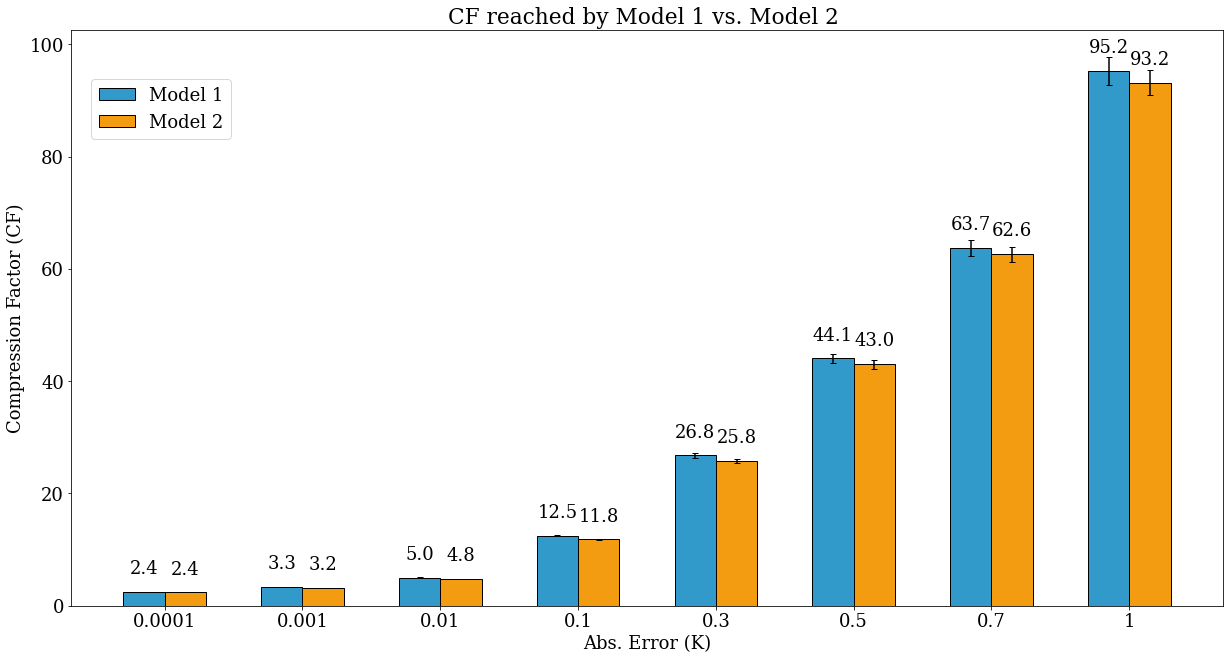

In [24]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rcParams["font.family"] = "serif"
fig = plt.figure(figsize=(16,8))
cf = np.arange(8)
ax = fig.add_axes([0,0,1,1])
pps = ax.bar(cf - 0.15, cf_1, width = 0.30, yerr = std_1, label = 'Model 1',  color = '#319ACB',  capsize = 3,
       edgecolor = 'k')
pps1= ax.bar(cf + 0.15, cf_2, width = 0.30, yerr = std_2, label = 'Model 2', color = '#F39C12',  capsize = 3,
       edgecolor = 'k')

#pps3 = ax.bar(cf + 0.30, cf_4, width = 0.20, label = 'Land-Sea Mask')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1:8] = ['0.0001', '0.001', '0.01', '0.1', '0.3', '0.5', '0.7', '1']
width = 0.30

for p in pps:
    height = p.get_height()
    ax.annotate('{}'.format(round(height,1)),
      xy=(p.get_x() + p.get_width() / 2, height+2),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom') 
    
    
for p in pps1:
    height = p.get_height()
    ax.annotate('{}'.format(round(height,1)),
      xy=(p.get_x() + p.get_width() / 2, height+2),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom') 
    

ax.set_xticklabels(labels)
fig.legend(bbox_to_anchor=(0.01, 1.03, 1, -0.1), loc=2,
           ncol=1)

plt.xlabel('Abs. Error (K)')
plt.ylabel('Compression Factor (CF)')
plt.title('CF reached by Model 1 vs. Model 2 ')
plt.savefig('best_mod_cf.png' ,dpi=300,bbox_inches='tight')